<a href="https://colab.research.google.com/github/dsshv/artificial_neural_networks/blob/main/auto_encod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import random

def add_interferences(dataset):
    x_size, y_size = 1, 1

    new_dataset = dataset
    for num in range (0, len(dataset)):
        for i in range (0, 40):
            x_rnd, y_rnd = random.randint(0, 28-x_size), random.randint(0,28-y_size)
            new_dataset[num][x_rnd:x_rnd+x_size, y_rnd:y_rnd+y_size] = 1

    return new_dataset

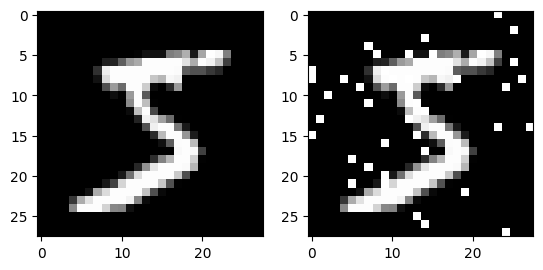

In [88]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

plt.subplot(1,2,1)

plt.imshow(x_train[0], cmap='gray', interpolation='none')
x_train_inf = add_interferences(x_train)

plt.subplot(1,2,2)
plt.imshow(x_train_inf[0], cmap='gray', interpolation='none')
        


In [89]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [90]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [91]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 49)                38465     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         39200     
                                                                 
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [92]:
hist_1 = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

hist_2 =autoencoder.fit(x_train_inf, x_train_inf,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3681 - val_loss: 0.2756
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2876 - val_loss: 0.2833
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2654 - val_loss: 0.2766
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2536 - val_loss: 0.2668
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2469 - val_loss: 0.2579
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2432 - val_loss: 0.2429
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2412 - val_loss: 0.2236
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2398 - val_loss: 0.2061
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2386 - val_loss: 0.1912
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2377 - val_loss: 0.1755

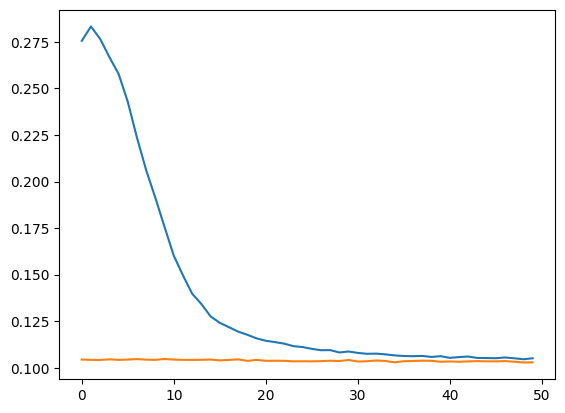

In [93]:
fig = plt.figure().add_subplot(1,1,1)
fig.plot(hist_1.history['val_loss'])
fig.plot(hist_2.history['val_loss'])

plt.show()

In [94]:
%matplotlib inline
import seaborn as sns

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [95]:
n = 10

imgs = x_train_inf[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

1/1 [==============================] - 0s 24ms/step


array([6.0277452 , 5.367626  , 2.2736742 , 0.77685297, 3.04244   ,
       4.4693766 , 1.2839411 , 4.8930526 , 2.8161845 , 0.0857811 ,
       1.6241355 , 2.3115482 , 3.014915  , 3.2279115 , 4.038826  ,
       2.5743585 , 4.543863  , 8.363613  , 2.9957829 , 4.610936  ,
       2.4985366 , 3.1425803 , 7.1038656 , 6.1352096 , 2.4856846 ,
       2.9129448 , 2.3329463 , 3.7703116 , 1.909049  , 6.1929336 ,
       4.0884666 , 5.833821  , 2.3610616 , 1.4179413 , 4.771327  ,
       4.177579  , 5.6250625 , 2.2400327 , 3.3082592 , 2.7894852 ,
       2.7172394 , 2.4319167 , 5.639759  , 2.7768962 , 5.2351837 ,
       3.3627505 , 4.2298656 , 3.7491317 , 4.486331  ], dtype=float32)

1/1 [==============================] - 0s 26ms/step


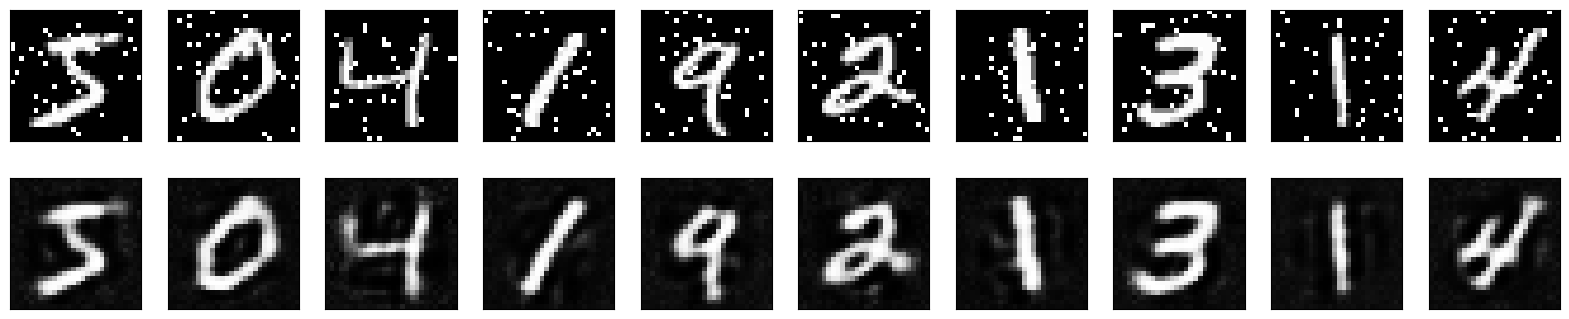

In [96]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

Глубокий автоэнкодер

In [97]:
def create_deep_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear')(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [98]:
d_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 49)                134750    
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         135485    
                                                                 
Total params: 270,235
Trainable params: 270,235
Non-trainable params: 0
_________________________________________________________________


In [99]:
hist_1 = d_autoencoder.fit(x_train, x_train,
                  epochs=100,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test))

hist_2 = d_autoencoder.fit(x_train_inf, x_train_inf,
                  epochs=100,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.3531 - val_loss: 0.2304
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2817 - val_loss: 0.1740
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2674 - val_loss: 0.1442
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2602 - val_loss: 0.1356
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2554 - val_loss: 0.1336
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2516 - val_loss: 0.1273
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2486 - val_loss: 0.1287
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2464 - val_loss: 0.1205
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2446 - val_loss: 0.1197
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2428 - val_lo

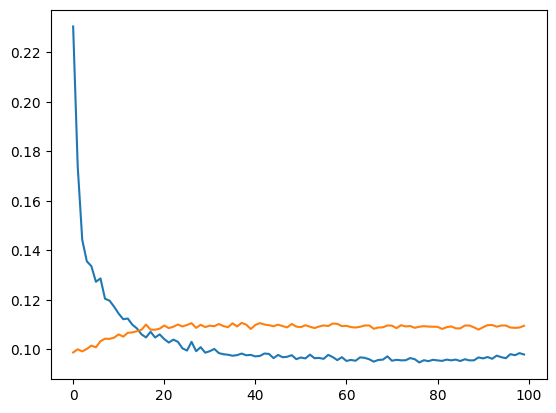

In [100]:
fig = plt.figure().add_subplot(1,1,1)
fig.plot(hist_1.history['val_loss'])
fig.plot(hist_2.history['val_loss'])

plt.show()

1/1 [==============================] - 0s 32ms/step


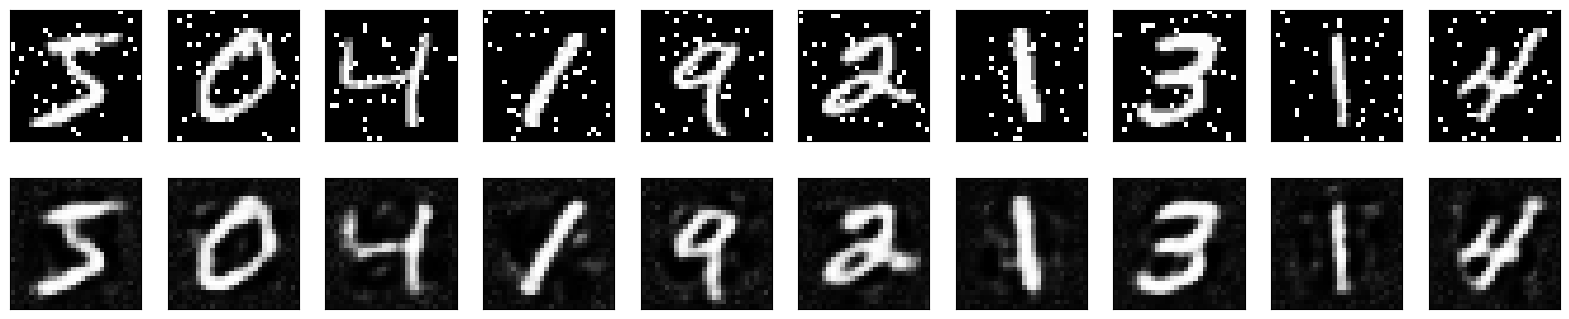

In [101]:
n = 10

imgs = x_train_inf[:n]
encoded_imgs = d_encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

decoded_imgs = d_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

Сверточный автоэнкодер

In [102]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

def create_deep_conv_ae():
    input_img = Input(shape=(28, 28, 1))

    x = Conv2D(128, (7, 7), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(1, (7, 7), activation='relu', padding='same')(x)

    # На этом моменте представление  (7, 7, 1) т.е. 49-размерное

    input_encoded = Input(shape=(7, 7, 1))
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)

    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae()
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

c_autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 7, 7, 1)           24385     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         24385     
                                                                 
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [103]:
hist_1 = c_autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

hist_2 = c_autoencoder.fit(x_train_inf, x_train_inf,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 445s 2s/step - loss: 0.3303 - val_loss: 0.1494
Epoch 2/10
235/235 [==============================] - 421s 2s/step - loss: 0.2566 - val_loss: 0.1262
Epoch 3/10
235/235 [==============================] - 434s 2s/step - loss: 0.2465 - val_loss: 0.1120
Epoch 4/10
235/235 [==============================] - 434s 2s/step - loss: 0.2416 - val_loss: 0.1071
Epoch 5/10
235/235 [==============================] - 392s 2s/step - loss: 0.2392 - val_loss: 0.1104
Epoch 6/10
235/235 [==============================] - 388s 2s/step - loss: 0.2366 - val_loss: 0.1042
Epoch 7/10
235/235 [==============================] - 388s 2s/step - loss: 0.2352 - val_loss: 0.1011
Epoch 8/10
235/235 [==============================] - 389s 2s/step - loss: 0.2340 - val_loss: 0.0986
Epoch 9/10
235/235 [==============================] - 389s 2s/step - loss: 0.2331 - val_loss: 0.0998
Epoch 10/10
235/235 [==============================] - 388s 2s/step - loss: 0.2322 - val_lo

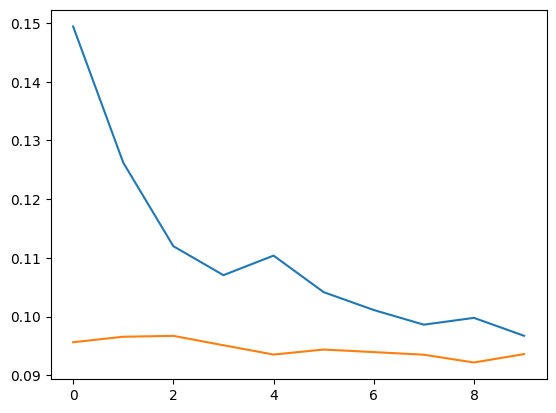

In [104]:
fig = plt.figure().add_subplot(1,1,1)
fig.plot(hist_1.history['val_loss'])
fig.plot(hist_2.history['val_loss'])

plt.show()

1/1 [==============================] - 0s 38ms/step


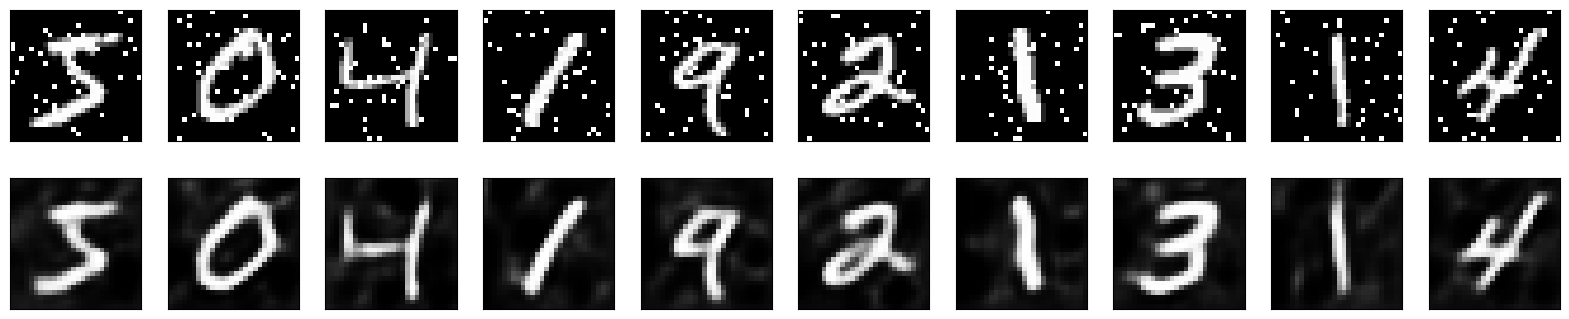

In [105]:
n = 10

imgs = x_train_inf[:n]
encoded_imgs = c_encoder.predict(imgs, batch_size=n)
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

Denoising автоэнкодер

In [106]:
import keras.backend as K
from keras.layers import Lambda

batch_size = 16

def create_denoising_model(autoencoder):
    def add_noise(x):
        noise_factor = 0.5
        x = x + K.random_normal(x.get_shape(), 0.5, noise_factor)
        x = K.clip(x, 0., 1.)
        return x

    input_img  = Input(batch_shape=(batch_size, 28, 28, 1))
    noised_img = Lambda(add_noise)(input_img)

    noiser = Model(input_img, noised_img, name="noiser")
    denoiser_model = Model(input_img, autoencoder(noiser(input_img)), name="denoiser")
    return noiser, denoiser_model


noiser, denoiser_model = create_denoising_model(autoencoder)
denoiser_model.compile(optimizer='adam', loss='binary_crossentropy')

In [107]:
hist_1 = denoiser_model.fit(x_train, x_train,
                   epochs=200,
                   batch_size=batch_size,
                   shuffle=True,
                   validation_data=(x_test, x_test))

hist = denoiser_model.fit(x_train_inf, x_train_inf,
                   epochs=200,
                   batch_size=batch_size,
                   shuffle=True,
                   validation_data=(x_test, x_test))

Epoch 1/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.2808 - val_loss: 0.1644
Epoch 2/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.2781 - val_loss: 0.1635
Epoch 3/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.2779 - val_loss: 0.1621
Epoch 4/200
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2777 - val_loss: 0.1550
Epoch 5/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.2776 - val_loss: 0.1606
Epoch 6/200
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2775 - val_loss: 0.1587
Epoch 7/200
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2774 - val_loss: 0.1575
Epoch 8/200
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2775 - val_loss: 0.1620
Epoch 9/200
3750/3750 [==============================] - 4s 1ms/step - loss: 0.2772 - val_loss: 0.1645
Epoch 10/200
3750/3750 [==============================] - 4s 1ms/step - l

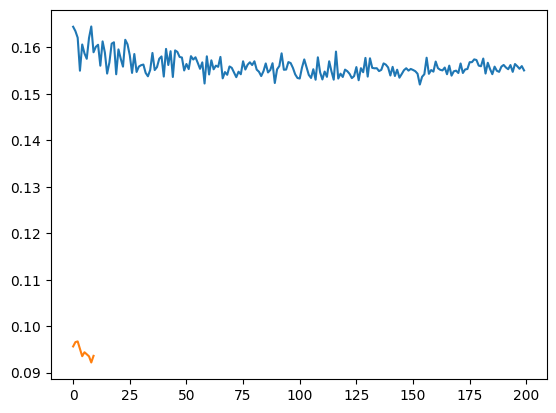

In [108]:
fig = plt.figure().add_subplot(1,1,1)
fig.plot(hist_1.history['val_loss'])
fig.plot(hist_2.history['val_loss'])

plt.show()

1/1 [==============================] - 0s 9ms/step


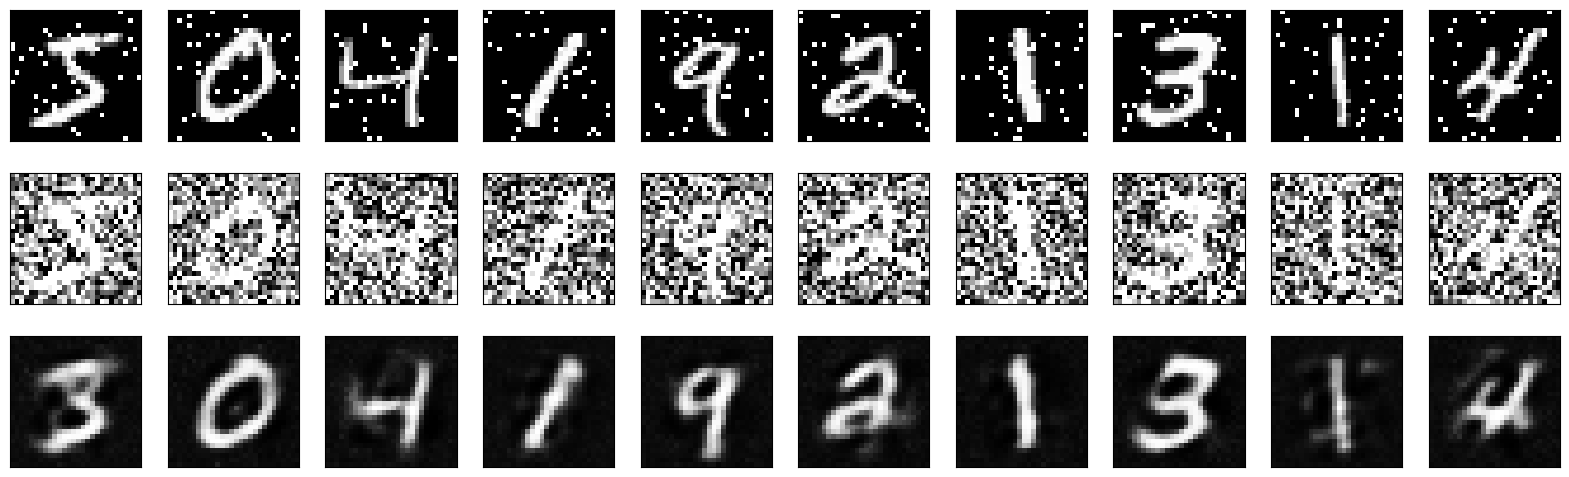

In [109]:
n = 10

imgs = x_train_inf[:batch_size]
noised_imgs = noiser.predict(imgs, batch_size=batch_size)
encoded_imgs = encoder.predict(noised_imgs[:n],  batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs[:n], batch_size=n)

plot_digits(imgs[:n], noised_imgs, decoded_imgs)

Разреженный (Sparse) автоэнкодер

In [110]:
from keras.regularizers import L1L2

def create_sparse_ae():
    encoding_dim = 16
    lambda_l1 = 0.00001
    
    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear', activity_regularizer=L1L2(lambda_l1))(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

s_encoder, s_decoder, s_autoencoder = create_sparse_ae()
s_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [111]:
hist_1 = s_autoencoder.fit(x_train, x_train,
                epochs=400,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

hist_2 = s_autoencoder.fit(x_train_inf, x_train_inf,
                epochs=400,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/400
235/235 [==============================] - 1s 4ms/step - loss: 0.3871 - val_loss: 0.2939
Epoch 2/400
235/235 [==============================] - 1s 3ms/step - loss: 0.3216 - val_loss: 0.2457
Epoch 3/400
235/235 [==============================] - 1s 3ms/step - loss: 0.3019 - val_loss: 0.2004
Epoch 4/400
235/235 [==============================] - 1s 3ms/step - loss: 0.2954 - val_loss: 0.1848
Epoch 5/400
235/235 [==============================] - 1s 3ms/step - loss: 0.2905 - val_loss: 0.1751
Epoch 6/400
235/235 [==============================] - 1s 3ms/step - loss: 0.2866 - val_loss: 0.1690
Epoch 7/400
235/235 [==============================] - 1s 3ms/step - loss: 0.2839 - val_loss: 0.1633
Epoch 8/400
235/235 [==============================] - 1s 3ms/step - loss: 0.2820 - val_loss: 0.1605
Epoch 9/400
235/235 [==============================] - 1s 3ms/step - loss: 0.2806 - val_loss: 0.1579
Epoch 10/400
235/235 [==============================] - 1s 3ms/step - loss: 0.2792 - val_lo

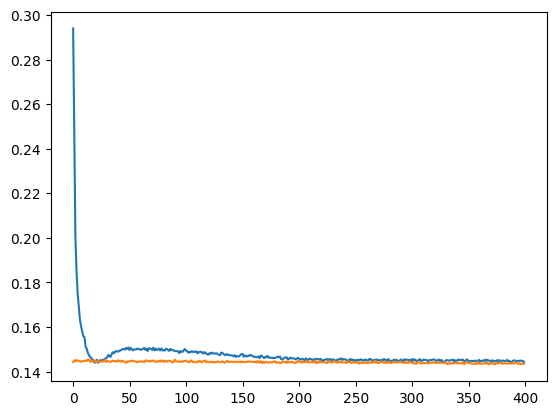

In [112]:
fig = plt.figure().add_subplot(1,1,1)
fig.plot(hist_1.history['val_loss'])
fig.plot(hist_2.history['val_loss'])

plt.show()

In [113]:
n = 10

imgs = x_train_inf[:n]
encoded_imgs = s_encoder.predict(imgs, batch_size=n)
encoded_imgs[1]

1/1 [==============================] - 0s 31ms/step


array([-0.00546271,  1.2981905 ,  0.34571347,  0.33024222,  0.59405416,
       -2.5989053 , -0.67165905,  0.85703844, -0.04523325, -0.7337088 ,
        0.44809842, -0.23634142,  0.01434338, -0.9942158 , -1.159656  ,
        0.03274412], dtype=float32)

1/1 [==============================] - 0s 30ms/step


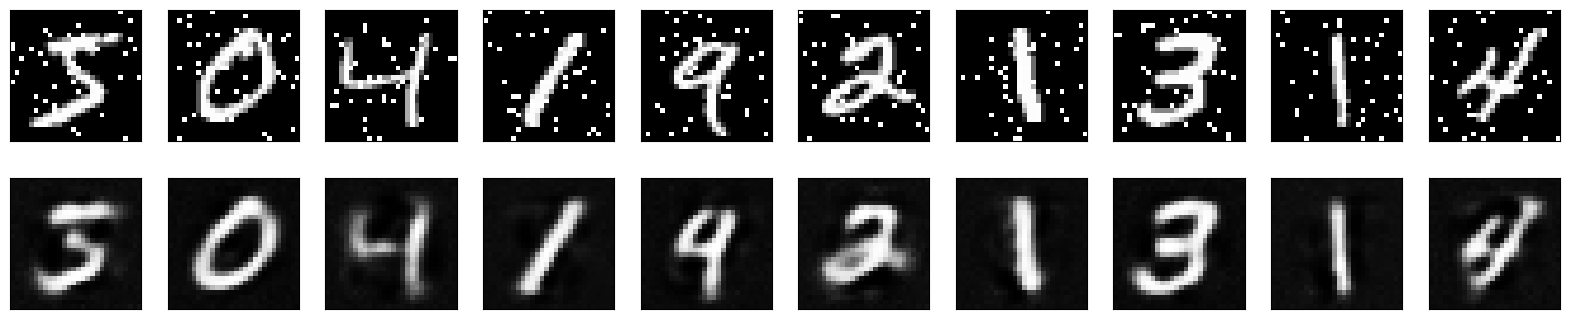

In [114]:
decoded_imgs = s_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)


1/1 [==============================] - 0s 35ms/step


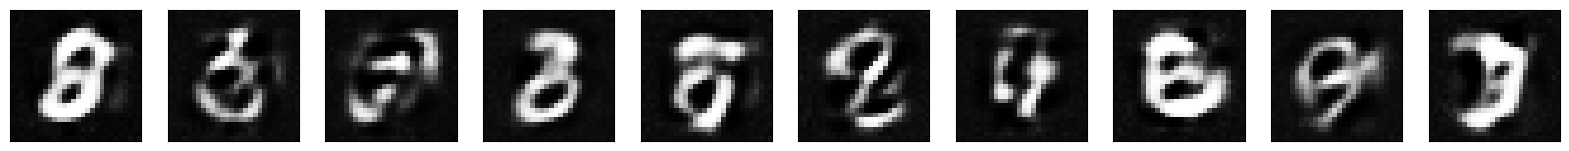

In [115]:
imgs = x_train_inf
encoded_imgs = s_encoder.predict(imgs, batch_size=16)
codes = np.vstack([encoded_imgs.mean(axis=0)]*10)
np.fill_diagonal(codes, encoded_imgs.max(axis=0))

decoded_features = s_decoder.predict(codes, batch_size=16)
plot_digits(decoded_features)
